In [3]:
import gzip
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plac
from IPython.display import clear_output
import random
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats as ss
import os
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
os.chdir('/gdrive/My Drive/IC_tales/code')
import disrupt as dr
import amutils as at

Mounted at /gdrive


<br><p>Carregando os dados</p><br>

In [0]:
dados = at.load_am_json_data()

In [0]:
G = at.build_graph(dados)

<br><p>Número de vértices e arestas de G:</p><br>

In [0]:
print("Vértices: ",G.number_of_nodes(),"\nArestas: ",G.number_of_edges())

Vértices:  32568 
Arestas:  119961


In [5]:
#G_table = dr.compute_disruption(G)
#G_table.to_csv(r'C:\Users\Tales Panoutsos\Documents\GitHub\IC\data\G_table.csv')
G_table = pd.read_csv('../data/G_table_allmusic_disruption.csv')
G_table = pd.DataFrame(data = G_table)
G_table = G_table.rename(columns = {'Unnamed: 0':''})
G_table.index = G_table['']
G_table = G_table.drop(columns = '')
G_table.head()

,ni_E,ni_D,ni,nj_E,nj_D,nj,nk_E,nk_D,nk,disruption,in,out,ci
,,,,,,,,,,,,,
mn0000112057,4.0,0.0,4.0,2.0,0.0,2.0,1109.0,62.0,1171.0,0.001699,6.0,12.0,0.3447
mn0000489999,26.0,1.0,27.0,14.0,0.0,14.0,1410.0,138.0,1548.0,0.008181,41.0,9.0,0.0476
mn0000485191,40.0,0.0,40.0,17.0,0.0,17.0,1535.0,80.0,1615.0,0.013756,57.0,9.0,0.0034
mn0000062583,1.0,0.0,1.0,5.0,0.0,5.0,2226.0,206.0,2432.0,-0.001641,6.0,16.0,0.2058
mn0000251361,8.0,0.0,8.0,6.0,0.0,6.0,939.0,308.0,1247.0,0.001586,14.0,10.0,0.3635


In [0]:
G_table = G_table.dropna().copy()

In [0]:
ci_g = dr.get_confidence_disruption(G_table)

In [0]:
G_table['ci'] = 1-ci_g
G_table.head()

,ni_E,ni_D,ni,nj_E,nj_D,nj,nk_E,nk_D,nk,disruption,in,out,ci
,,,,,,,,,,,,,
mn0000112057,4.0,0.0,4.0,2.0,0.0,2.0,1109.0,62.0,1171.0,0.001699,6.0,12.0,0.3378
mn0000489999,26.0,1.0,27.0,14.0,0.0,14.0,1410.0,138.0,1548.0,0.008181,41.0,9.0,0.0429
mn0000485191,40.0,0.0,40.0,17.0,0.0,17.0,1535.0,80.0,1615.0,0.013756,57.0,9.0,0.0028
mn0000062583,1.0,0.0,1.0,5.0,0.0,5.0,2226.0,206.0,2432.0,-0.001641,6.0,16.0,0.2112
mn0000251361,8.0,0.0,8.0,6.0,0.0,6.0,939.0,308.0,1247.0,0.001586,14.0,10.0,0.3621


<br><h3>Disruptividade de gêneros dentro do grafo inteiro</h3>
<p>Calculamos a disruptividade para so grafo inteiro e comparamos a disruptividade de nodes de determinado gênero com seu score no pagerank.</p>
<p>Fazemos isso para cada gênero.</p><br>

In [0]:
G_table['pagerank'] = pd.DataFrame(nx.pagerank(G).values(), index = nx.pagerank(G).keys())

In [0]:
generos = at.build_reverse_index(dados)[1]

In [0]:
correlations = []
for genero in generos:
    dtd_genero = G_table.loc[generos[genero].intersection(G_table[G_table['ci']<0.05].index)]
    correlations.append(tuple(ss.spearmanr(dtd_genero['disruption'],dtd_genero['pagerank'])))

pd.DataFrame(correlations, index = generos, columns = ['correlation','p_value'])


,correlation,p_value
Pop/Rock,-0.284099,4.132657e-08
Latin,-0.390360,3.390302e-01
Country,0.204544,2.458889e-01
Easy Listening,-0.500000,6.666667e-01
Rap,-0.150287,3.026713e-01
Folk,0.008255,9.680762e-01
Reggae,0.221855,4.268018e-01
International,-0.053389,8.691105e-01
Electronic,-0.172131,1.923590e-01
Blues,0.334503,4.614730e-02


<br><h3>Ni,j,k separados</h3>
<p>Ao calcularmos a disruptividade do grafo inteiro esparamos os Ns entre nodes do mesmo gênero e nodes de gêneros diferentes.</p>

In [0]:
G_table.head()

,ni_E,ni_D,ni,nj_E,nj_D,nj,nk_E,nk_D,nk,disruption,in,out,ci,pagerank
,,,,,,,,,,,,,,
mn0000112057,4.0,0.0,4.0,2.0,0.0,2.0,1109.0,62.0,1171.0,0.001699,6.0,12.0,0.3451,0.000036
mn0000489999,26.0,1.0,27.0,14.0,0.0,14.0,1410.0,138.0,1548.0,0.008181,41.0,9.0,0.0468,0.000148
mn0000485191,40.0,0.0,40.0,17.0,0.0,17.0,1535.0,80.0,1615.0,0.013756,57.0,9.0,0.0046,0.000240
mn0000062583,1.0,0.0,1.0,5.0,0.0,5.0,2226.0,206.0,2432.0,-0.001641,6.0,16.0,0.2119,0.000020
mn0000251361,8.0,0.0,8.0,6.0,0.0,6.0,939.0,308.0,1247.0,0.001586,14.0,10.0,0.3640,0.000032


In [0]:
G_table['disruption_D'] = (G_table['ni_D']-G_table['nj_D'])/(G_table['ni_D']+G_table['nj_D']+G_table['nk_D'])

In [0]:
G_table['disruption_E'] = (G_table['ni_E']-G_table['nj_E'])/(G_table['ni_E']+G_table['nj_E']+G_table['nk_E'])

<br><p>Correlação com pagerank?</p><br>

In [0]:
G_table['pagerank'] = pd.DataFrame(nx.pagerank(G).values(), index = nx.pagerank(G).keys())


SpearmanrResult(correlation=0.1434453872546232, pvalue=1.0857197785705885e-36)


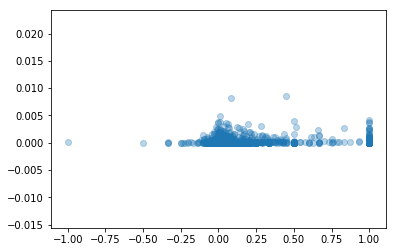

SpearmanrResult(correlation=0.015232995003438856, pvalue=0.18131273208683613)


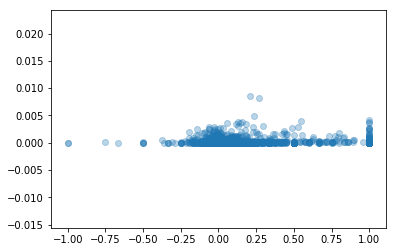

In [0]:
print(ss.spearmanr(G_table.dropna()['disruption_D'],G_table.dropna()['pagerank']))
plt.scatter(G_table.dropna()['disruption_D'],G_table.dropna()['pagerank'], alpha=0.3)
plt.show()
print(ss.spearmanr(G_table.dropna()['disruption_E'],G_table.dropna()['pagerank']))
plt.scatter(G_table.dropna()['disruption_E'],G_table.dropna()['pagerank'], alpha=0.3)
plt.show()

<br><p>E dentro de um genêro especifico?</p><br>

In [0]:
generos = at.build_reverse_index(dados)[1]

In [0]:
correlations_D = []
correlations_E = []
correlations = []
medianas_D = []
medianas_E = []
medianas = []
for genero in generos:
    dtd_genero = G_table.loc[generos[genero].intersection(G_table[G_table['ci']<0.05].index)]
    dtd_genero = dtd_genero.dropna()
    medianas_D.append(dtd_genero['disruption_D'].median())
    medianas_E.append(dtd_genero['disruption_E'].median())
    medianas.append(dtd_genero['disruption'].median())
    correlations_D.append(list(ss.spearmanr(dtd_genero['disruption_D'],dtd_genero['pagerank'])))    
    correlations_E.append(list(ss.spearmanr(dtd_genero['disruption_E'],dtd_genero['pagerank'])))    
    correlations.append(list(ss.spearmanr(dtd_genero['disruption'],dtd_genero['pagerank'])))    

df = pd.DataFrame(correlations_D, index = generos, columns = ['correlation_D','p_value_D'])
df['correlation_E'] = np.array(correlations_E)[:,0]
df['p_value_E'] = np.array(correlations_E)[:,1]
df['correlation'] = np.array(correlations)[:,0]
df['p_value'] = np.array(correlations)[:,1]
df['disruption_D'] = medianas_D
df['disruption_E'] = medianas_E
df['disruption'] = medianas
df

,correlation_D,p_value_D,correlation_E,p_value_E,correlation,p_value,disruption_D,disruption_E,disruption
Pop/Rock,-0.105538,0.052559,-0.181610,0.000795,-0.168789,0.001846,0.000000,0.005925,0.005956
Latin,0.162169,0.728300,-0.234244,0.613155,-0.198206,0.670085,0.207792,0.714286,0.268571
Country,0.224051,0.202723,0.179072,0.310906,0.204544,0.245889,-0.000538,-0.038019,-0.011390
Easy Listening,-0.500000,0.666667,-0.866025,0.333333,-0.500000,0.666667,0.150000,0.000000,0.147059
Rap,-0.205186,0.176333,-0.124786,0.414081,-0.236263,0.118167,0.033210,0.061947,0.055944
Folk,0.177442,0.406826,0.092456,0.667427,0.155992,0.466688,0.053059,0.029009,0.061504
Reggae,0.231519,0.425793,0.131119,0.655019,0.237792,0.412999,0.059761,0.268362,0.066360
International,0.181278,0.572863,-0.153049,0.634874,-0.053389,0.869110,0.060481,0.635714,0.079985
Electronic,-0.073212,0.591796,0.037239,0.785251,-0.129310,0.342193,0.009741,0.126316,0.051635
Blues,0.324264,0.053679,0.330103,0.049272,0.334503,0.046147,0.176011,0.112878,0.142841


---
Correlação entre a disruptividade do blues e seu pagerank score

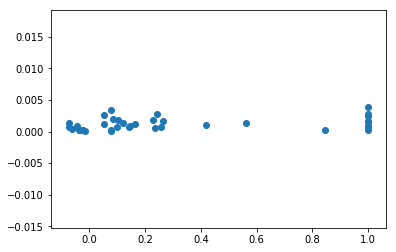

In [0]:
dtd_genero = G_table.loc[generos['Blues'].intersection(G_table[G_table['ci']<0.05].index)]
dtd_genero = dtd_genero.dropna()
plt.scatter(dtd_genero['disruption'],dtd_genero['pagerank'])

---

<br><h3>Correlação entre os tipos de disruptividade</h3>
<p>Existe uma correlação entre disruption, disruption_E e disruption_D?</p><br>

In [0]:
G_table[['disruption','disruption_D','disruption_E']].corr()

,disruption,disruption_D,disruption_E
disruption,1.000000,0.986017,0.991519
disruption_D,0.986017,1.000000,0.900842
disruption_E,0.991519,0.900842,1.000000


In [0]:
index_disruptivers_D = G_table[G_table['ci']<0.05].index.intersection(G_table[G_table['disruption'] <0.8].index).intersection(G_table[G_table['disruption_D'] > 0.9].index).intersection(G_table[ G_table['disruption_E'] < 0.8].index)
G_table.loc[index_disruptivers_D]

,ni_E,ni_D,ni,nj_E,nj_D,nj,nk_E,nk_D,nk,disruption,in,out,ci,pagerank,disruption_D,disruption_E
,,,,,,,,,,,,,,,,
mn0000296750,8.0,1.0,9.0,0.0,0.0,0.0,15.0,0.0,15.0,0.375000,9.0,4.0,0.0410,0.000024,1.0,0.347826
mn0000536126,10.0,2.0,12.0,0.0,0.0,0.0,6.0,0.0,6.0,0.666667,12.0,2.0,0.0156,0.001068,1.0,0.625000
mn0000075140,9.0,18.0,27.0,0.0,0.0,0.0,7.0,0.0,7.0,0.794118,27.0,3.0,0.0000,0.000313,1.0,0.562500
mn0000095166,8.0,1.0,9.0,0.0,0.0,0.0,24.0,0.0,24.0,0.272727,9.0,3.0,0.0434,0.000026,1.0,0.250000
mn0000026350,13.0,3.0,16.0,0.0,0.0,0.0,5.0,0.0,5.0,0.761905,16.0,2.0,0.0025,0.000214,1.0,0.722222
mn0000591459,9.0,1.0,10.0,0.0,0.0,0.0,12.0,0.0,12.0,0.454545,10.0,4.0,0.0297,0.000039,1.0,0.428571


mn0000026350 - Mozart
https://www.allmusic.com/artist/wolfgang-amadeus-mozart-mn0000026350/biography
mn0000075140 - Sebastian Bach
https://www.allmusic.com/artist/johann-sebastian-bach-mn0000075140/biography

In [0]:
index_disruptivers_D = G_table[G_table['ci']<0.05].index.intersection(G_table[G_table['disruption'] <0.8].index).intersection(G_table[G_table['disruption_D'] < 0.8].index).intersection(G_table[ G_table['disruption_E'] > 0.9].index)
G_table.loc[index_disruptivers_D]

,ni_E,ni_D,ni,nj_E,nj_D,nj,nk_E,nk_D,nk,disruption,in,out,ci,pagerank,disruption_D,disruption_E
,,,,,,,,,,,,,,,,
mn0000362658,9.0,2.0,11.0,0.0,0.0,0.0,0.0,4.0,4.0,0.733333,11.0,2.0,0.0210,0.000444,0.333333,1.0
mn0000857040,5.0,8.0,13.0,0.0,0.0,0.0,0.0,10.0,10.0,0.565217,13.0,1.0,0.0114,0.000100,0.444444,1.0


mn0000362658 - Rudy Vallée https://www.allmusic.com/artist/rudy-vall%C3%A9e-mn0000362658/songs
mn0000857040 - Morton-Subotnick https://www.allmusic.com/artist/morton-subotnick-mn0000857040

<h2>Pergunta</h2>
<p>O que acontece se eu ignorar k?</p>

In [0]:
G_table_new = G_table[["ni","nj","nk","disruption","pagerank","in","out"]].copy()

In [0]:
G_table_new["disruption_wo_k"] = (G_table_new['ni'] - G_table_new['nj']) / (G_table_new['ni'] + G_table_new['nj'])    
G_table_new.head()

,ni,nj,nk,disruption,pagerank,in,out,disruption_wo_k
,,,,,,,,
mn0000112057,4.0,2.0,1171.0,0.001699,0.000036,6.0,12.0,0.333333
mn0000489999,27.0,14.0,1548.0,0.008181,0.000148,41.0,9.0,0.317073
mn0000485191,40.0,17.0,1615.0,0.013756,0.000240,57.0,9.0,0.403509
mn0000062583,1.0,5.0,2432.0,-0.001641,0.000020,6.0,16.0,-0.666667
mn0000251361,8.0,6.0,1247.0,0.001586,0.000032,14.0,10.0,0.142857


SpearmanResult: 0.8366329863369453 p-value:  0.0
PearsonResult:  0.646774627241156 p-value:  0.0


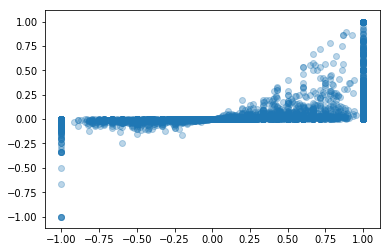

In [0]:
print("SpearmanResult:",ss.spearmanr(G_table_new["disruption_wo_k"], G_table_new["disruption"])[0], "p-value: ",ss.spearmanr(G_table_new["disruption_wo_k"], G_table_new["disruption"])[1])         
print("PearsonResult: ", ss.pearsonr(G_table_new["disruption_wo_k"], G_table_new["disruption"])[0], "p-value: ",ss.pearsonr(G_table_new["disruption_wo_k"], G_table_new["disruption"])[1])
plt.scatter(G_table_new["disruption_wo_k"], G_table_new["disruption"], alpha = 0.3)
plt.show()

<p>O k influencia MUITO.</p>

SpearmanResult: -0.38125271415877854 p-value:  0.0
PearsonResult:  -0.09687115923355619 p-value:  3.881121212044577e-31


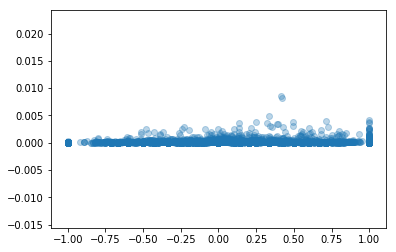

In [0]:
print("SpearmanResult:",ss.spearmanr(G_table_new["disruption_wo_k"], G_table_new["pagerank"])[0], "p-value: ",ss.spearmanr(G_table_new["disruption_wo_k"], G_table_new["pagerank"])[1])         
print("PearsonResult: ", ss.pearsonr(G_table_new["disruption_wo_k"], G_table_new["pagerank"])[0], "p-value: ",ss.pearsonr(G_table_new["disruption_wo_k"], G_table_new["pagerank"])[1])
plt.scatter(G_table_new["disruption_wo_k"], G_table_new["pagerank"], alpha = 0.3)
plt.show()

<h3>O que seria a disruptividade sem k?</h3>
<p>Se um artista A for influenciado por um artista B que viveu a bastante tempo, o artista A é bastante penalizado por ter um k grande, ou seja, existem bastantes artistas que que foram influenciados por B mas não por A. O problema, é que se esses artistas tambem forem antigos o suficiente, eles não tiveram nem a oportunidade de serem influenciados por A. Logo, B está sendo penalizado por apenas por ser influênciado por A. </p>

<p>Repare que os artistas em i e j, necessáriamente vieram depois, ou pelo menos na mesma época que o artista análisado, chamarei de A. Mas em k não. Um artista em k, pode nunca ter sabido da existencia de A, já que pode ter morrido antes de A virar artista. Portanto é certo usa-lo na métrica?</p>

<p>E se somarmos o k, mas penalizando quando o seguidor em comum entre A e os nodes de k tiver muita centralidade?</p>


In [0]:
indexes = G_table_new[G_table_new['disruption_wo_k']>0.9].index.intersection(G_table_new[G_table_new['disruption']<0.1].index).intersection(G_table_new[G_table['ci']<0.05].index)     

for i in G_table_new.loc[indexes].index:     
    print(G.nodes[i]['name'])
G_table_new.loc[indexes]

The J.B.'s
Norman Whitfield
Brian Wilson
Andrew Bird
James Chance & The Contortions
Holland-Dozier-Holland
Hot Tuna
George Harrison
The Last Poets
Miriam Makeba
Adele
Artie Shaw
Joe Zawinul
Katy Perry
Future
The Cardigans
Goblin
The Avalanches
Paul van Dyk
Hans Zimmer
Tampa Red
Chris & Cosey
Mike Patton
The Primitives
Diplo


,ni,nj,nk,disruption,pagerank,in,out,disruption_wo_k
,,,,,,,,
mn0000071970,39.0,1.0,901.0,0.040383,0.000216,40.0,14.0,0.950000
mn0000957729,10.0,0.0,376.0,0.025907,0.000059,10.0,8.0,1.000000
mn0000625736,65.0,2.0,652.0,0.087622,0.000194,67.0,10.0,0.940299
mn0000026193,13.0,0.0,1155.0,0.011130,0.000044,13.0,12.0,1.000000
mn0000132185,12.0,0.0,378.0,0.030769,0.000042,12.0,1.0,1.000000
mn0000958916,12.0,0.0,197.0,0.057416,0.000058,12.0,2.0,1.000000
mn0000268871,9.0,0.0,423.0,0.020833,0.000020,9.0,15.0,1.000000
mn0000209142,29.0,1.0,788.0,0.034230,0.000086,30.0,16.0,0.933333
mn0000090018,28.0,1.0,530.0,0.048301,0.000370,29.0,7.0,0.931034


mn0000859589 - Katy Perry https://www.allmusic.com/artist/katy-perry-mn0000859589/biography
mn0000503460 - Adele https://www.allmusic.com/artist/adele-mn0000503460/related

In [0]:
indexes = G_table_new[G_table_new['disruption_wo_k']<-0.9].index.intersection(G_table_new[G_table_new['disruption']>-0.1].index).intersection(G_table_new[G_table['ci']<0.05].index)      
for i in G_table_new.loc[indexes].index:
    print(G.nodes[i]['name'])
G_table_new.loc[indexes]

Art Farmer
Pentagram
Don Covay
Jackie McLean
Helen Forrest
Gerry & the Pacemakers
The Searchers
Booker Little
Be Bop Deluxe
Kansas
Kenny Dorham
Herman's Hermits
The Business
Jim & Jesse
Saint Vitus


,ni,nj,nk,disruption,pagerank,in,out,disruption_wo_k
,,,,,,,,
mn0000502199,0.0,15.0,945.0,-0.015625,0.000041,15.0,15.0,-1.000000
mn0000308932,0.0,19.0,1148.0,-0.016281,0.000061,19.0,9.0,-1.000000
mn0002993710,0.0,11.0,826.0,-0.013142,0.000122,11.0,10.0,-1.000000
mn0000127949,0.0,13.0,761.0,-0.016796,0.000042,13.0,8.0,-1.000000
mn0000673360,0.0,9.0,211.0,-0.040909,0.000027,9.0,6.0,-1.000000
mn0000541125,0.0,9.0,1991.0,-0.004500,0.000056,9.0,10.0,-1.000000
mn0000898828,0.0,13.0,2119.0,-0.006098,0.000077,13.0,11.0,-1.000000
mn0000097529,0.0,12.0,763.0,-0.015484,0.000033,12.0,5.0,-1.000000
mn0000127337,0.0,10.0,2586.0,-0.003852,0.000082,10.0,11.0,-1.000000


mn0000287259 - Saint Vitus https://www.allmusic.com/artist/saint-vitus-mn0000287259
                           https://pt.wikipedia.org/wiki/Saint_Vitus